In [1]:
import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D,BatchNormalization
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
#generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 3s 0us/step


In [3]:
#config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.001)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
#convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


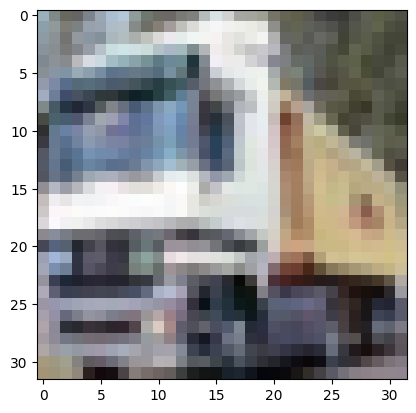

In [5]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:

# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [7]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [10]:
history = model.fit(x=x_train, y=one_hot_y_train, batch_size=128, epochs=25, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 28s 80ms/step - loss: 1.8108 - accuracy: 0.3185 - val_loss: 1.8449 - val_accuracy: 0.4074
Epoch 2/25
352/352 [==============================] - 27s 75ms/step - loss: 1.3152 - accuracy: 0.5239 - val_loss: 1.7136 - val_accuracy: 0.5036
Epoch 3/25
352/352 [==============================] - 27s 77ms/step - loss: 1.0802 - accuracy: 0.6285 - val_loss: 2.1433 - val_accuracy: 0.5200
Epoch 4/25
352/352 [==============================] - 28s 78ms/step - loss: 0.9061 - accuracy: 0.6981 - val_loss: 1.1846 - val_accuracy: 0.6314
Epoch 5/25
352/352 [==============================] - 28s 79ms/step - loss: 0.7773 - accuracy: 0.7440 - val_loss: 0.7295 - val_accuracy: 0.7562
Epoch 6/25
352/352 [==============================] - 28s 78ms/step - loss: 0.6667 - accuracy: 0.7826 - val_loss: 0.7788 - val_accuracy: 0.7420
Epoch 7/25
352/352 [==============================] - 28s 79ms/step - loss: 0.5763 - accuracy: 0.8142 - val_loss: 0.7030 - val_accuracy:

In [11]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 5s 131ms/step - loss: 0.6908 - accuracy: 0.8519


[0.6907870173454285, 0.8518999814987183]

1/1 [==============================] - 0s 21ms/step
predict class: 5
expected class: 5


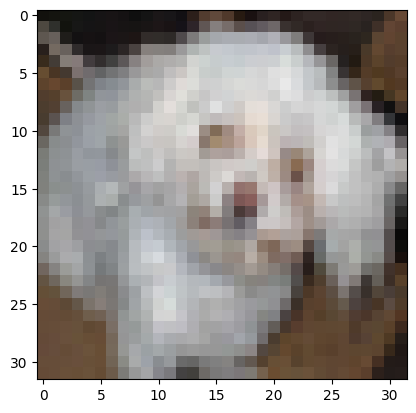

In [17]:
model.save("keras-VGG16-cifar10.h5")
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
   if result[0][i] > result[0][predict]:
    predict = i
print("predict class:",predict)
print("expected class:",expect)

In [18]:
# save model
model.save("keras-VGG16-cifar10.h5")

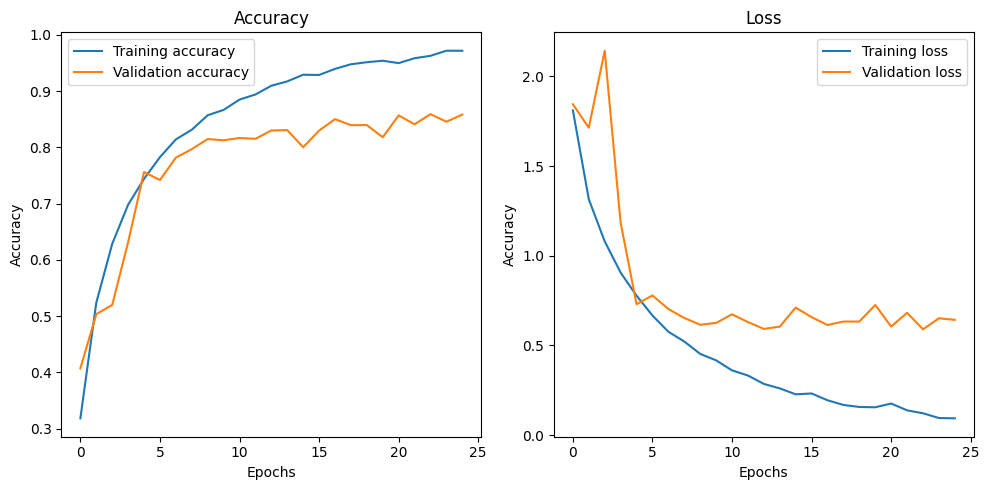

In [19]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].set_title('Accuracy')

# plot training and validation loss
axs[1].plot(history.history['loss'], label='Training loss')
axs[1].plot(history.history['val_loss'], label='Validation loss')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].set_title('Loss')

# adjust layout
plt.tight_layout()

# show the figure
plt.show()

313/313 [==============================] - 3s 9ms/step


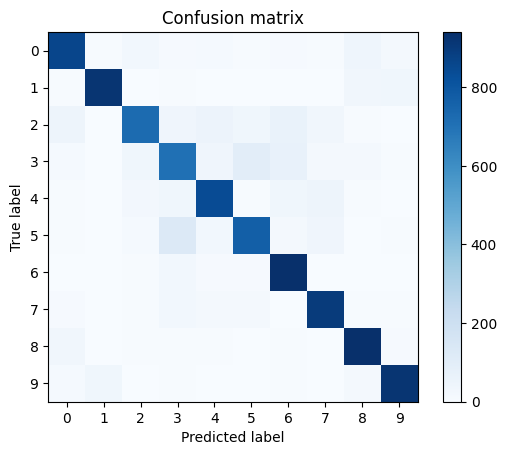

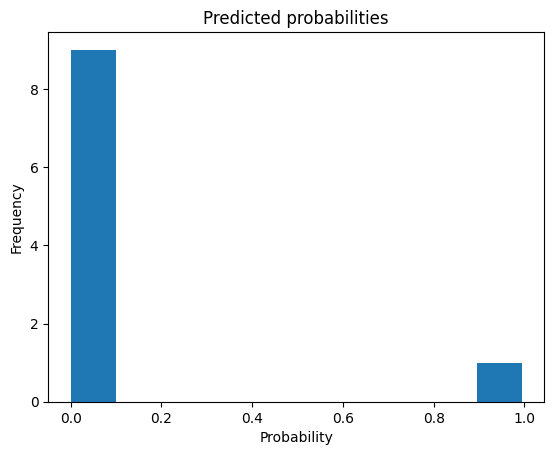

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.ravel()
cm = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# plot a histogram of the predicted probabilities for a sample image
plt.hist(y_pred[1000])
plt.title('Predicted probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()
